# Visualizing results

In [1]:
cd /home

/home


In [228]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import pandas as pd
import numpy as np
import toml
import wandb
import toml
import glob
import os

from src.data.loaders import get_loader

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading data

In [229]:
loader = get_loader('./data/records/alcock/fold_0/alcock/test/',
                   batch_size=16,
                   window_size=200,
                   probed_frac=.5,
                   random_frac=.2,
                   nsp_prob=1.,
                   sampling=True,
                   shuffle=False,
                   repeat=1,
                   num_cls=None,
                   normalize='zero-mean', # 'minmax'
                   cache=False,
                   return_ids=False,
                   return_lengths=False,
                   aversion='2')

[INFO] Repeating dataset x1 times
[INFO] Sampling random windows
[INFO] Loading PT task: Masking


In [277]:
for x, y in loader.take(1):
    seg = x['seg_emb']-1
    
    x_inp = tf.boolean_mask(x['magnitudes'][0], 1.-x['att_mask'][0])
    y_inp = tf.boolean_mask(y['magnitudes'][0], 1.-x['att_mask'][0])
    t_inp = tf.boolean_mask(x['times'][0], 1.-x['att_mask'][0])
    

    
    plt.plot(t_inp, y_inp, marker='.', label='Original', linewidth=1, linestyle='--')
#     plt.plot(t_first, x_first, linewidth=1, label='1st')
#     plt.plot(t_second, x_second, linewidth=1, label='2nd')
    plt.title('{}'.format(y['nsp_label'][0]))

    plt.legend()

ValueError: too many values to unpack (expected 2)

In [452]:
from src.data.nsp import randomize

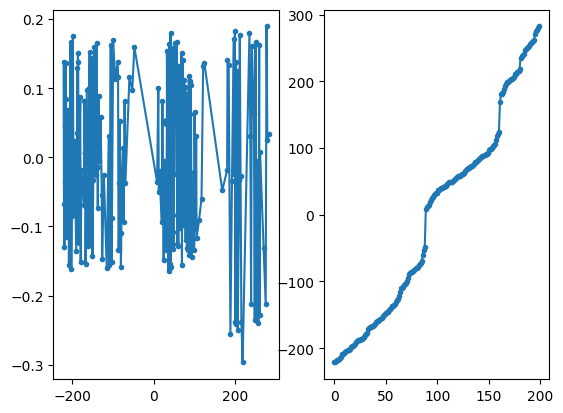

In [453]:
for x in loader.take(1):
    out, to = randomize(x, nsp_prob=1.)
    yy = tf.boolean_mask(out['nsp_magnitudes'][0,...,0], out['nsp_pad_mask'][0])
    xx = tf.boolean_mask(out['nsp_times'][0,...,0], out['nsp_pad_mask'][0])

    
    N=99
    fig, axes = plt.subplots(1, 2)
    axes[0].scatter(xx[N], yy[N])
    axes[0].plot(xx, yy, marker='.')
    axes[1].plot(xx, marker='.')

In [60]:
oo[0]

<tf.Tensor: shape=(200,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, Fal

In [64]:
out['nsp_pad_mask'][0]

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>